# Raiffeisen Data Cup

[на бустерс](https://boosters.pro/champ_11)

Клиенты Райффайзенбанка совершают покупки и снимают наличные в банкоматах с помощью карточек. Получив в виде обезличенных данных их историю транзакций, информацию о мерчантах (место, позволяющее принимать платежи с использованием банковской пластиковой карты), участники чемпионата должны предсказать две пары координат: дом и работу клиента. Оценкой качества решения в задаче является процент попаданий в окружность радиуса 0.02 градуса относительно реальных координат дома и работы.¶
* terminal_id = идентификационный номер терминала
* customer_id = идентификационный номер клиента
* amount = количество потраченных средств за транзакцию
* country = страна
* currency = валюта
* mcc = код категории продавца
* transaction_date = дата транзакции
* atm_address = адрес банкомата
* pos_address = адрес установки pos-терминала
* pos_address_lat = адрес установки pos-терминала широта
* pos_address_lon = адрес установки pos-терминала долгота
* work_add_lat = широта работы клиента
* work_add_lon = долгота работы клиента
* home_add_lat = широта дома клиента
* home_add_lon = долгота дома клиента

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train_set.csv')
data.head(20)

Q:\Dmitriy\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177
5,2.909018,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177
6,2.801228,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177
7,2.838200,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177
8,3.264740,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,bcb3d58edc38eefade93d916db39b25f,2017-08-18,59.847,30.177
9,3.118792,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,7fa36740d3d66ed86f69f5b3578de264,2017-05-13,59.847,30.177


Сразу виден ряд проблем - большое количество пропусков, различные написания одного и того же города, часто отсутствуют целевые значения (!!!). Видимо действительно просто дёрнули кусок логов.

Проведём ряд визуализаций

In [5]:
import datetime
df = data
df = df[pd.notnull(df['transaction_date'])]
df['transaction_date'] = df['transaction_date'].astype(str)
df['transaction_date'] = df['transaction_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%A'))
df['transaction_date'].value_counts().plot.bar()
print(df['transaction_date'].value_counts())

Q:\Dmitriy\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
Q:\Dmitriy\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Friday       202303
Thursday     178801
Tuesday      176014
Wednesday    174633
Saturday     173367
Monday       170167
Sunday       149405
Name: transaction_date, dtype: int64


In [8]:
np.sum(df['country'] != 'RUS')

10279

In [11]:
print(df['country'].value_counts()[:100])

RUS    1214411
RU        6356
DEU        238
CZE        215
THA        177
ITA        177
BGR        158
UKR        138
TUR        131
GEO        128
BLR        121
AUT        117
GRC        101
FRA         96
ESP         95
CYP         94
USA         93
KAZ         93
ISR         92
EGY         88
IDN         72
GBR         72
MNE         72
CHN         60
KGZ         59
ARE         56
SRB         55
CHE         51
CAN         51
VNM         51
        ...   
EST          7
DE           7
CUB          7
KG           6
GR           6
AE           6
AZ           6
AT           6
NOR          6
UZ           5
ZAF          5
HU           5
BG           5
NL           5
ISL          4
AU           4
NZL          4
HR           4
PER          4
JAM          4
AM           4
HK           4
JOR          4
HKG          4
MD           4
QA           3
TN           3
ES           3
GB           3
JPN          3
Name: country, Length: 100, dtype: int64


MOSCOW           270827
SANKT-PETERBU    151841
MOSKVA            90164
MOSKVA            85932
ST PETERSBURG     27441
ST-PETERSBURG     19544
EKATERINBURG      18063
NOVOSIBIRSK       15801
CHEREPOVETS       14732
N.NOVGOROD        13131
MOSCOW            11751
KRASNOYARSK       11005
KRASNODAR         10522
SAMARA             7928
KAZAN              7857
SOCHI              6895
OREL               6888
PODOLSK            6666
SYKTYVKAR          6632
CHEREPOVETS        6232
Name: city, dtype: int64


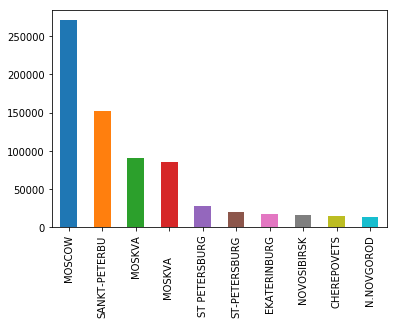

In [12]:
df = data
df.city = df.city.str.upper()

print(df.city.value_counts()[:20])
df.city.value_counts()[:10].plot.bar()

Средняя величина 2.8289504696575807
Минимум -2.0123559735
Максимум 6.075306611699999
Медиана 2.73835138615


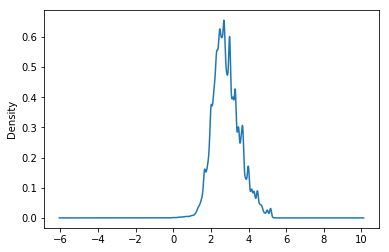

In [13]:
print('Средняя величина',np.mean(df.amount))
print('Минимум',np.min(df.amount))
print('Максимум',np.max(df.amount))
print('Медиана',np.median(df.amount))
amount = df.amount.sort_values()
amount.plot.kde()

,amount,atm_address_lat,atm_address_lon,currency,home_add_lat,home_add_lon,mcc,pos_adress_lat,pos_adress_lon,work_add_lat,work_add_lon
amount,1.000000,0.013254,-0.026108,0.007926,-0.024575,-0.006199,0.289714,-0.002165,-0.027596,-0.020791,-0.012587
atm_address_lat,0.013254,1.000000,-0.192423,0.006407,0.938459,-0.190630,-0.000466,NaN,NaN,0.932853,-0.189188
atm_address_lon,-0.026108,-0.192423,1.000000,-0.037925,-0.195657,0.910023,-0.002810,NaN,NaN,-0.197612,0.869699
currency,0.007926,0.006407,-0.037925,1.000000,0.003672,-0.014765,0.026844,0.004288,0.001067,0.003635,-0.015624
home_add_lat,-0.024575,0.938459,-0.195657,0.003672,1.000000,-0.223150,-0.032242,0.835957,-0.210631,0.934096,-0.218533
home_add_lon,-0.006199,-0.190630,0.910023,-0.014765,-0.223150,1.000000,0.019733,-0.206620,0.844380,-0.220672,0.905515
mcc,0.289714,-0.000466,-0.002810,0.026844,-0.032242,0.019733,1.000000,-0.014112,0.007427,-0.028977,0.019338
pos_adress_lat,-0.002165,NaN,NaN,0.004288,0.835957,-0.206620,-0.014112,1.000000,-0.226036,0.832188,-0.196887
pos_adress_lon,-0.027596,NaN,NaN,0.001067,-0.210631,0.844380,0.007427,-0.226036,1.000000,-0.207334,0.820378
work_add_lat,-0.020791,0.932853,-0.197612,0.003635,0.934096,-0.220672,-0.028977,0.832188,-0.207334,1.000000,-0.227047


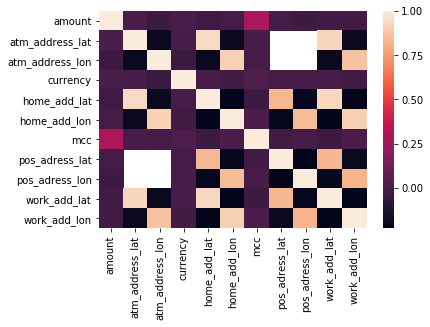

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
df = data[pd.notnull(data['home_add_lat'])]
df = data[pd.notnull(data['home_add_lon'])]
df = data[pd.notnull(data['work_add_lon'])]
df = data[pd.notnull(data['work_add_lon'])]
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

**Пайплайн обработки данных**

1. Переводим в нижний регистр, заполняем nan нулями, строчные заполняем значениями "unknown", убираем символы по типу .-><%*"&#
2. Перевод разных написаний одного и того же города "moskva" => "moscow", "moskv" => "moscow"
3. То же с названиями стран
4. Также сокращаем количество atm_addresses
5. Добавляем поле день недели и флаг выходной или нет
6. Добавляем средние, дисперсии для суммы транзакции
7. Считаем периодичность транзакций (среднее расстояние во времени между одинаковыми по месту и ~ сумме денег транзакциям)
8. Убираем шум - единичные для пользователя транзакции
9. Убираем праздники
10. Оставляем только те значения mcc, которые есть и в тестовом датасете
11. Убираем дубликаты
12. Оставляем по одному сагреггированному образцу каждой типовой транзакции для пользователя
13. OneHotEncoding - опционально
14. Подсчитываем количество точек сбыта или получения средств вокруг работы и дома с малым и большим радиусом
15. Меняем координаты мест на классы. Будем решать задачу классификации. Причём, если 2 места пересекаются, то берём середину между ними, сливая их в 1 класс. По условию задачи это приемлимо
16. Добавляем в тестовую и обучающую выборку колонки так, чтобы в обоих наборах был одинаковый набор (после one hot encoding-а) - опционально
17. Убираем классы для которых у нас слишком мало информации (есть всего 1 транзакция)

Пайплайн написан под библиотеку luigi, поскольку требовалась возможность потенциального использования наработок в продакшне. Luigi предоставляет пошаговую обработку датасетов, с фиксацией промежуточных результатов и контролем зависимостей, более того, текущий пайплайн можно легко интегрировать для работы с hadoop-кластером, и вместо выполнения тяжелых запросов в опреативной памяти ноутбука, делать всё тоже самое с использованием Spark-а

Решить задачу до окончания приёма задач я не успел, слишком много времени потратил на препроцессинг

Несмотря на весьма существенное сокращение объёма данных, их по прежнему достаточно много.

Работая над задачей (как задачей регрессии), я применял разные методы:
* Линейная регрессия --> не работает + не справляется с такими объёмами + зависимости существенно нелинейные
* Случайный лес --> слишком долго обучается, не нашёл реализаций с поддержкой GPU.
* Регрессия xgboost --> обучается быстро, но точность оставляет желать лучшего, приемлемые результаты получаются только при радиусе эквивалентном радиусу Петербурга. Получается, что это примерно как говорить, что человек живёт в Петербурге, если ходит в булочную в Петербурге.
Как показали мои эксперименты и результаты других участников, регрессию в этой задаче лучше не использовать. Таким образом предлагается решать задачу классификации. Полученное количество классов по местам работы порядка 2000, а домов порядка 5000. Важно то, что количество этих классов удалось существенно сократить благодаря предобработке (см. препроцессинг). 

Решая задачу классификации, я пробовал следующие методы:
* LightGBM
* XGBoost
Попытки использовать LightGBM были обусловлены тем, что данных много, и хочется максимально сократить объём потребляемой памяти. LightGBM даёт такую возможность (разница в объём до появления ошибок памяти -- десятки тысяч строк данных). Однако, от использования этой библиотеки пришлось отказаться в пользу XGBoost, ввиду того, что обучение происходило слишком долго. Поскольку данные достаточно разреженные, LightGBM использует ресурсы графического ускорителя минимально, поэтому особого ускорения и не получается. XGBoost, напротив, использует GPU "по полной", благодаря чему можно ставить больше экспериментов, подбирать гиперпараметры, быстрее получать отклик на собственные гипотезы.

Итак, был сделан выбор в пользу XGBoost. Остаётся только проблема невозможности обучения на полном объеме данных (ввиду большого количества классов). Опытным путём удалось установить, что xgb стабильно может обучаться ~30000 строках данных. 

Таким образом прелагается следующий поход:
1. Обучаются N моделей xgboost на подвыборке из 30000 строк.
2. Выборка формируется пошагово: сначала выбирается случайный класс из обучающей выборки, а из него случайный элемент этого класса
3. После обучения N моделей можно, например, устраивать голосование за выбираемый класс, или даже взять вероятности от каждой модели, и обучить дополнительно какой-нибудь линейный классификатор. В этом notebook-е я пробую подход с голосованием, поскольку он проще в реализации, а также поскольку я указал немного не тот параметр при обучении моделей (мне выдаются классы, а не вероятности)

Получается некоторая смесь бустинга с случайным лесом. Мотивируется такой подход тем, что разные модели будут обнаруживать различные закономерности за счёт случайного выбора элементов базовой выборки, при том не переобучаясь на идентификацию того или иного класса благодаря более менее равномерному распределению классов в каждой подвыборке (что на практике на самом деле получилось не так, 30000 маловато для такого количества классов, распределение далеко не равномерно, либо я где-то ошибся)

In [2]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('train_set_stage_21_no_one_hot.csv')
train_data['terminal_type'].replace('atm', False, inplace=True)
train_data['terminal_type'].replace('pos', True, inplace=True)

In [3]:
customer_ids = train_data['customer_id']
train_data.head(5)

,amount,currency,customer_id,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,3.143099,6430,0001f322716470bf9bfc1708f06f00fc,5211,44.769577,37.698696,True,5,True,0.000000,3.143099,0,-1,-1.000000,1,82,36
1,2.291870,6430,0001f322716470bf9bfc1708f06f00fc,6011,0.000000,0.000000,False,0,False,0.570234,3.240944,1,14,20.142857,15,82,36
2,2.009585,6430,0001f322716470bf9bfc1708f06f00fc,6011,0.000000,0.000000,False,5,True,0.570234,3.240944,1,16,20.142857,15,82,36
3,3.616949,6430,0001f322716470bf9bfc1708f06f00fc,6011,0.000000,0.000000,False,0,False,0.570234,3.240944,2,2,16.933332,16,82,36
4,3.015420,6430,0001f322716470bf9bfc1708f06f00fc,6011,0.000000,0.000000,False,6,True,0.570234,3.240944,2,19,16.933332,16,82,36


In [4]:
# оптимизация типов данных
cols = []
types = []
for col in train_data.columns:
  cols.append(col)
  if ('amount' in col) or ('lat' in col) or ('lon' in col) or ('mean' in col) or ('var' in col):
    types.append(np.float32)
    continue
  if ('customer_id' in col):
    types.append(np.str)
    continue
  if ('dist_after_last' in col) or ('place_visited' in col) or ('locality' in col) or ('cat' in col) or ('dayofweek' in col) or ('mcc' in col) or ('currency' in col):
    types.append(np.int16)
    continue
  types.append(np.bool)
    
print(len(cols))
print(len(types))

dt = np.dtype(list(zip(cols, types)))

17
17


In [4]:
train_data['amount'] = train_data['amount'].astype(dt['amount'])
train_data['currency'] = train_data['currency'].astype(dt['currency'])
train_data['customer_id'] = train_data['customer_id'].astype(dt['customer_id'])
train_data['mcc'] = train_data['mcc'].astype(dt['mcc'])
train_data['terminal_lat'] = train_data['terminal_lat'].astype(dt['terminal_lat'])
train_data['terminal_lon'] = train_data['terminal_lon'].astype(dt['terminal_lon'])
train_data['terminal_type'] = train_data['terminal_type'].astype(dt['terminal_type'])
train_data['dayofweek'] = train_data['dayofweek'].astype(dt['dayofweek'])
train_data['isweekend'] = train_data['isweekend'].astype(dt['isweekend'])
train_data['amount_var'] = train_data['amount_var'].astype(dt['amount_var'])
train_data['amount_mean'] = train_data['amount_mean'].astype(dt['amount_mean'])
train_data['transaction_category'] = train_data['transaction_category'].astype(dt['transaction_category'])
train_data['dist_after_last'] = train_data['dist_after_last'].astype(dt['dist_after_last'])
train_data['mean_dist'] = train_data['mean_dist'].astype(dt['mean_dist'])
train_data['place_visited'] = train_data['place_visited'].astype(dt['place_visited'])
train_data['home_cat'] = train_data['home_cat'].astype(dt['home_cat'])
train_data['work_cat'] = train_data['work_cat'].astype(dt['work_cat'])

In [5]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
amount                  5 non-null float32
currency                5 non-null int16
customer_id             5 non-null object
mcc                     5 non-null int16
terminal_lat            5 non-null float32
terminal_lon            5 non-null float32
terminal_type           5 non-null bool
dayofweek               5 non-null int16
isweekend               5 non-null bool
amount_var              5 non-null float32
amount_mean             5 non-null float32
transaction_category    5 non-null int16
dist_after_last         5 non-null int16
mean_dist               5 non-null float32
place_visited           5 non-null int16
home_cat                5 non-null int16
work_cat                5 non-null int16
dtypes: bool(2), float32(6), int16(8), object(1)
memory usage: 735.0 bytes


In [6]:
train_data.shape

(5, 17)

## WORK_CAT

In [76]:
len(np.unique(train_data['work_cat']))

2321

In [77]:
u = np.unique(train_data['work_cat'])
for idx in range(len(u)):
    train_data['work_cat'].replace(u[idx], idx, inplace=True)

In [78]:
u = np.unique(train_data['home_cat'])
for idx in range(len(u)):
    train_data['home_cat'].replace(u[idx], idx, inplace=True)

In [79]:
train_data[train_data['home_cat']==3545].shape

(71, 17)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score

In [11]:
ncats = len(np.unique(train_data[target_column]))

In [6]:
def construct_train_data_raif(data, y_data, num_classes=2321, size_of_result=30000, class_col='work_cat'):
    import random
    """
    Берёт на вход данные, формирует новую выборку следующим образом:
    1) Случайно выбирает класс из данных
    2) Случайно берёт один из элементов выбранного класса
    3) Делает так до тех пор, пока не наберётся достаточное количество данных
    """
    assert data.shape[0] == y_data.shape[0], "data and y_data shapes must be equal"
    assert len(y_data.shape)==1, "y_data must be 1-d array like object"
    groups_data = []
    groups_y = []
    elems = {}
    for i in range(num_classes):
        groups_data.append(data[data[class_col]==i])
        groups_y.append(y_data[y_data==i])
        elems[i] = []
    for j in range(size_of_result):
        chosen_class = random.randint(0, num_classes - 1)
        elems[chosen_class].append(random.randint(0,groups_y[chosen_class].shape[0]-1))
    # Так почему-то не работает, придется выставлять типы руками
    #result_data = pd.DataFrame(columns=data.columns, dtype=data.dtypes)
    result_data = pd.DataFrame(columns=data.columns)
    result_y = pd.Series(dtype=y_data.dtype)
    for group_id, values in elems.items():
        result_data = result_data.append(groups_data[group_id].iloc[values],ignore_index=True)
        result_y = result_y.append(groups_y[group_id].iloc[values],ignore_index=True)
        
    return result_data, result_y

In [13]:
# использовалось для разбиения на обучающую и тестовые выборки
tr_data = train_data.drop(columns=['customer_id'])
y = tr_data[target_column]
X = tr_data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
sss.get_n_splits(X, y)
for train_idx, test_idx in sss.split(X,y):
    X_train_data=X.iloc[train_idx]
    X_test_data=X.iloc[test_idx]
    y_train_data=y.iloc[train_idx]
    y_test_data=y.iloc[test_idx]

In [14]:
X_train_data.to_csv('X_train_data.csv')
X_test_data.to_csv('X_test_data.csv')
y_train_data.to_csv('y_train_data.csv')
y_test_data.to_csv('y_test_data.csv')

In [1]:
import pandas as pd

In [2]:
X_train_data = pd.read_csv('X_train_data.csv')
y_train_data = pd.read_csv('y_train_data.csv')

In [7]:
X_train_data.columns

Index(['Unnamed: 0', 'amount', 'currency', 'mcc', 'terminal_lat',
       'terminal_lon', 'terminal_type', 'dayofweek', 'isweekend', 'amount_var',
       'amount_mean', 'transaction_category', 'dist_after_last', 'mean_dist',
       'place_visited', 'home_cat', 'work_cat'],
      dtype='object')

In [8]:
X_train_data.head(5)

,Unnamed: 0,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,166586,4.320839,6430,6011,59.73800,30.624000,False,2,False,0.000000,4.320839,0,-1,-1.0,1,4116,0
1,205338,4.046859,6430,6011,55.76600,37.659000,False,1,False,0.000000,4.046859,0,-1,-1.0,1,2290,1133
2,126001,3.710691,6430,6011,0.00000,0.000000,False,3,False,0.000069,3.704819,3,-1,-1.0,1,4984,1950
3,184805,0.970634,6430,5541,45.00314,37.861088,True,6,True,0.001523,0.943042,3,-1,-1.0,1,2406,0
4,39104,2.298921,9780,6011,55.60300,37.542000,False,0,False,0.000000,2.298921,0,-1,-1.0,1,1627,920


In [9]:
X_train_data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
X_train_data['amount'] = X_train_data['amount'].astype(dt['amount'])
X_train_data['currency'] = X_train_data['currency'].astype(dt['currency'])
X_train_data['mcc'] = X_train_data['mcc'].astype(dt['mcc'])
X_train_data['terminal_lat'] = X_train_data['terminal_lat'].astype(dt['terminal_lat'])
X_train_data['terminal_lon'] = X_train_data['terminal_lon'].astype(dt['terminal_lon'])
X_train_data['terminal_type'] = X_train_data['terminal_type'].astype(dt['terminal_type'])
X_train_data['dayofweek'] = X_train_data['dayofweek'].astype(dt['dayofweek'])
X_train_data['isweekend'] = X_train_data['isweekend'].astype(dt['isweekend'])
X_train_data['amount_var'] = X_train_data['amount_var'].astype(dt['amount_var'])
X_train_data['amount_mean'] = X_train_data['amount_mean'].astype(dt['amount_mean'])
X_train_data['transaction_category'] = X_train_data['transaction_category'].astype(dt['transaction_category'])
X_train_data['dist_after_last'] = X_train_data['dist_after_last'].astype(dt['dist_after_last'])
X_train_data['mean_dist'] = X_train_data['mean_dist'].astype(dt['mean_dist'])
X_train_data['place_visited'] = X_train_data['place_visited'].astype(dt['place_visited'])
X_train_data['home_cat'] = X_train_data['home_cat'].astype(dt['home_cat'])
X_train_data['work_cat'] = X_train_data['work_cat'].astype(dt['work_cat'])

In [14]:
X_train_data.head(5)

,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,4.320839,6430,6011,59.737999,30.624001,False,2,False,0.000000,4.320839,0,-1,-1.0,1,4116,0
1,4.046859,6430,6011,55.765999,37.659000,False,1,False,0.000000,4.046859,0,-1,-1.0,1,2290,1133
2,3.710691,6430,6011,0.000000,0.000000,False,3,False,0.000069,3.704819,3,-1,-1.0,1,4984,1950
3,0.970634,6430,5541,45.003139,37.861088,True,6,True,0.001523,0.943043,3,-1,-1.0,1,2406,0
4,2.298921,9780,6011,55.603001,37.542000,False,0,False,0.000000,2.298921,0,-1,-1.0,1,1627,920


In [18]:
target_column = 'work_cat'

In [19]:
len(np.unique(X_train_data[target_column]))

2321

In [16]:
X_train_data[X_train_data['home_cat']==3545].shape

(52, 16)

In [15]:
import xgboost as xgb

In [16]:
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': ncats, # Number of possible output classes
         #'updater': 'grow_gpu',
         #'num_class': 2321,
         'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
         #'eta': 0.01, 
         #'subsample': 0.7,
         #'colsample_bytree': 0.8, 
         #'max_depth':3, 
         #'min_child_weight':3, 
         #'seed':0
         }


In [20]:
N_classifiers = 10
for i in range(N_classifiers):
    print("Making the classifier {}".format(i))
    print("Preparing data...")
    X_generated, y_generated = construct_train_data_raif(X_train_data, X_train_data[target_column], ncats, 30000, target_column)
    print("Data preparation done")
    X_generated['amount'] = X_generated['amount'].astype(dt['amount'])
    X_generated['currency'] = X_generated['currency'].astype(dt['currency'])
    X_generated['mcc'] = X_generated['mcc'].astype(dt['mcc'])
    X_generated['terminal_lat'] = X_generated['terminal_lat'].astype(dt['terminal_lat'])
    X_generated['terminal_lon'] = X_generated['terminal_lon'].astype(dt['terminal_lon'])
    X_generated['terminal_type'] = X_generated['terminal_type'].astype(dt['terminal_type'])
    X_generated['dayofweek'] = X_generated['dayofweek'].astype(dt['dayofweek'])
    X_generated['isweekend'] = X_generated['isweekend'].astype(dt['isweekend'])
    X_generated['amount_var'] = X_generated['amount_var'].astype(dt['amount_var'])
    X_generated['amount_mean'] = X_generated['amount_mean'].astype(dt['amount_mean'])
    X_generated['transaction_category'] = X_generated['transaction_category'].astype(dt['transaction_category'])
    X_generated['dist_after_last'] = X_generated['dist_after_last'].astype(dt['dist_after_last'])
    X_generated['mean_dist'] = X_generated['mean_dist'].astype(dt['mean_dist'])
    X_generated['place_visited'] = X_generated['place_visited'].astype(dt['place_visited'])
    X_generated['home_cat'] = X_generated['home_cat'].astype(dt['home_cat'])
    X_generated['work_cat'] = X_generated['work_cat'].astype(dt['work_cat'])
    X_generated.info(memory_usage='deep')
    X_generated = X_generated.drop(columns=['home_cat', 'work_cat'])
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
    sss.get_n_splits(X_generated, y_generated)
    for train_index, test_index in sss.split(X_generated, y_generated):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train_current, X_test_current = X_generated.iloc[train_index], X_generated.iloc[test_index]
        y_train_current, y_test_current = y_generated.iloc[train_index], y_generated.iloc[test_index]
        # Convert input data from numpy to XGBoost format
        dtrain = xgb.DMatrix(X_train_current, label=y_train_current)
        dtest = xgb.DMatrix(X_test_current, label=y_test_current)

        gpu_res = {} # Store accuracy result

        # Train model
        model = xgb.train(param, dtrain, 50, evals=[(dtest, 'test')], evals_result=gpu_res, early_stopping_rounds=5)
        # save model
        model.save_model('xgboost_models/model_work_{}.model'.format(i))
        # dump model
        model.dump_model('xgboost_models/model_work_{}.txt'.format(i))
        
        # эта часть долго подсчитывается, поучим без неё, да она и не особо нужна
        # load model to predict
        #print('Load model_{} to predict'.format(i))
        #model = xgb.Booster({'nthread': 4})  # init model
        #model.load_model('xgboost_models/model_{}.model'.format(i))
        #y_pred_classes = model.predict(dtest)
        # eval with loaded model
        #print('The accuracy of loaded model\'s prediction is:', accuracy_score(y_test_current, y_pred_classes))

Making the classifier 6
Preparing data...
Data preparation done
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 202954 to 80049
Data columns (total 16 columns):
amount                  30000 non-null float32
currency                30000 non-null int16
mcc                     30000 non-null int16
terminal_lat            30000 non-null float32
terminal_lon            30000 non-null float32
terminal_type           30000 non-null bool
dayofweek               30000 non-null int16
isweekend               30000 non-null bool
amount_var              30000 non-null float32
amount_mean             30000 non-null float32
transaction_category    30000 non-null int16
dist_after_last         30000 non-null int16
mean_dist               30000 non-null float32
place_visited           30000 non-null int16
home_cat                30000 non-null int16
work_cat                30000 non-null int16
dtypes: bool(2), float32(6), int16(8)
memory usage: 1.4 MB
TRAIN: [10669 16771 22904 ... 166

[0]	test-merror:0.987556
Will train until test-merror hasn't improved in 5 rounds.
[1]	test-merror:0.944333
[2]	test-merror:0.888333
[3]	test-merror:0.842444
[4]	test-merror:0.795556
[5]	test-merror:0.754556
[6]	test-merror:0.724111
[7]	test-merror:0.700556
[8]	test-merror:0.679333
[9]	test-merror:0.659
[10]	test-merror:0.644556
[11]	test-merror:0.634333
[12]	test-merror:0.623556
[13]	test-merror:0.613111
[14]	test-merror:0.606222
[15]	test-merror:0.599111
[16]	test-merror:0.591111
[17]	test-merror:0.583444
[18]	test-merror:0.577444
[19]	test-merror:0.571333
[20]	test-merror:0.567667
[21]	test-merror:0.562778
[22]	test-merror:0.558222
[23]	test-merror:0.556222
[24]	test-merror:0.553444
[25]	test-merror:0.550111
[26]	test-merror:0.548778
[27]	test-merror:0.547778
[28]	test-merror:0.546111
[29]	test-merror:0.544333
[30]	test-merror:0.544
[31]	test-merror:0.543667
[32]	test-merror:0.542444
[33]	test-merror:0.542
[34]	test-merror:0.541111
[35]	test-merror:0.539667
[36]	test-merror:0.539889

In [28]:
target_column='work_cat'

In [29]:
X_test_data = pd.read_csv('X_test_data_work_cat.csv')

In [30]:
X_test_data.head(5)

,Unnamed: 0,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,172607,2.306461,6430,6011,55.140000,38.723000,False,3,False,0.000000,2.306461,0,-1,-1.000000,1,1220,0
1,170739,2.693060,6430,6011,0.000000,0.000000,False,6,True,0.495609,2.842481,2,-1,4.000000,2,893,1482
2,30564,3.834578,6430,5411,55.805714,37.412632,True,6,True,0.000000,3.834578,0,-1,-1.000000,1,2674,1505
3,117207,2.513108,6430,5411,59.930855,30.347763,True,3,False,0.000000,2.513108,0,-1,-1.000000,1,4561,2046
4,127051,2.619113,6430,5411,59.946620,30.477879,True,3,False,0.129535,2.615062,2,6,12.923077,14,4942,1984


In [31]:
X_test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [32]:
X_test_data['amount'] = X_test_data['amount'].astype(dt['amount'])
X_test_data['currency'] = X_test_data['currency'].astype(dt['currency'])
X_test_data['mcc'] = X_test_data['mcc'].astype(dt['mcc'])
X_test_data['terminal_lat'] = X_test_data['terminal_lat'].astype(dt['terminal_lat'])
X_test_data['terminal_lon'] = X_test_data['terminal_lon'].astype(dt['terminal_lon'])
X_test_data['terminal_type'] = X_test_data['terminal_type'].astype(dt['terminal_type'])
X_test_data['dayofweek'] = X_test_data['dayofweek'].astype(dt['dayofweek'])
X_test_data['isweekend'] = X_test_data['isweekend'].astype(dt['isweekend'])
X_test_data['amount_var'] = X_test_data['amount_var'].astype(dt['amount_var'])
X_test_data['amount_mean'] = X_test_data['amount_mean'].astype(dt['amount_mean'])
X_test_data['transaction_category'] = X_test_data['transaction_category'].astype(dt['transaction_category'])
X_test_data['dist_after_last'] = X_test_data['dist_after_last'].astype(dt['dist_after_last'])
X_test_data['mean_dist'] = X_test_data['mean_dist'].astype(dt['mean_dist'])
X_test_data['place_visited'] = X_test_data['place_visited'].astype(dt['place_visited'])
X_test_data['home_cat'] = X_test_data['home_cat'].astype(dt['home_cat'])
X_test_data['work_cat'] = X_test_data['work_cat'].astype(dt['work_cat'])

In [33]:
X_test_data.head(5)

,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,2.306461,6430,6011,55.139999,38.723000,False,3,False,0.000000,2.306461,0,-1,-1.000000,1,1220,0
1,2.693060,6430,6011,0.000000,0.000000,False,6,True,0.495609,2.842481,2,-1,4.000000,2,893,1482
2,3.834578,6430,5411,55.805714,37.412632,True,6,True,0.000000,3.834578,0,-1,-1.000000,1,2674,1505
3,2.513108,6430,5411,59.930855,30.347763,True,3,False,0.000000,2.513108,0,-1,-1.000000,1,4561,2046
4,2.619113,6430,5411,59.946621,30.477879,True,3,False,0.129535,2.615062,2,6,12.923077,14,4942,1984


In [35]:
y_test_data = X_test_data[target_column][:72000]
X_test_data = X_test_data[:72000]
X_test_data.drop(columns=['home_cat','work_cat'], inplace=True)

In [36]:
def count_correct(a,b):
    assert a.shape == b.shape, "shapes must be equal"
    res = 0
    for idx in range(a.shape[0]):
        if a[idx] == b.iloc[idx]:
             res+=1
    return res

def count_correct_no_pandas(a,b):
    assert a.shape == b.shape, "shapes must be equal"
    res = 0
    for idx in range(a.shape[0]):
        if a[idx] == b[idx]:
             res+=1
    return res

In [38]:
for idx in range(10):
    summary = 0
    for j in range(X_test_data.shape[0] // 1000):
        X_test_data_current = X_test_data[j*1000:(j+1)*1000]
        y_test_data_current = y_test_data[j*1000:(j+1)*1000]
        model = xgb.Booster({'predictor': 'gpu_predictor'})
        model.load_model('xgboost_models/model_work_{}.model'.format(idx))
        dtest = xgb.DMatrix(X_test_data_current, label=y_test_data_current)
        y_pred_classes = model.predict(dtest)
        print('The accuracy of loaded model {} prediction on slice {} is:'.format(idx, j), accuracy_score(y_test_data_current, y_pred_classes))
        summary += count_correct(y_pred_classes,y_test_data_current)
        model =None
    print("Overall accuracy of model {} is {}".format(idx, summary/float(X_test_data.shape[0])))

The accuracy of loaded model 0 prediction on slice 0 is: 0.1
The accuracy of loaded model 0 prediction on slice 1 is: 0.099
The accuracy of loaded model 0 prediction on slice 2 is: 0.081
The accuracy of loaded model 0 prediction on slice 3 is: 0.097
The accuracy of loaded model 0 prediction on slice 4 is: 0.089
The accuracy of loaded model 0 prediction on slice 5 is: 0.108
The accuracy of loaded model 0 prediction on slice 6 is: 0.081
The accuracy of loaded model 0 prediction on slice 7 is: 0.073
The accuracy of loaded model 0 prediction on slice 8 is: 0.079
The accuracy of loaded model 0 prediction on slice 9 is: 0.082
The accuracy of loaded model 0 prediction on slice 10 is: 0.085
The accuracy of loaded model 0 prediction on slice 11 is: 0.089
The accuracy of loaded model 0 prediction on slice 12 is: 0.077
The accuracy of loaded model 0 prediction on slice 13 is: 0.095
The accuracy of loaded model 0 prediction on slice 14 is: 0.079
The accuracy of loaded model 0 prediction on slice 1

The accuracy of loaded model 1 prediction on slice 56 is: 0.072
The accuracy of loaded model 1 prediction on slice 57 is: 0.084
The accuracy of loaded model 1 prediction on slice 58 is: 0.083
The accuracy of loaded model 1 prediction on slice 59 is: 0.078
The accuracy of loaded model 1 prediction on slice 60 is: 0.093
The accuracy of loaded model 1 prediction on slice 61 is: 0.066
The accuracy of loaded model 1 prediction on slice 62 is: 0.075
The accuracy of loaded model 1 prediction on slice 63 is: 0.094
The accuracy of loaded model 1 prediction on slice 64 is: 0.064
The accuracy of loaded model 1 prediction on slice 65 is: 0.079
The accuracy of loaded model 1 prediction on slice 66 is: 0.084
The accuracy of loaded model 1 prediction on slice 67 is: 0.083
The accuracy of loaded model 1 prediction on slice 68 is: 0.085
The accuracy of loaded model 1 prediction on slice 69 is: 0.081
The accuracy of loaded model 1 prediction on slice 70 is: 0.087
The accuracy of loaded model 1 predictio

The accuracy of loaded model 3 prediction on slice 39 is: 0.093
The accuracy of loaded model 3 prediction on slice 40 is: 0.062
The accuracy of loaded model 3 prediction on slice 41 is: 0.096
The accuracy of loaded model 3 prediction on slice 42 is: 0.085
The accuracy of loaded model 3 prediction on slice 43 is: 0.087
The accuracy of loaded model 3 prediction on slice 44 is: 0.086
The accuracy of loaded model 3 prediction on slice 45 is: 0.081
The accuracy of loaded model 3 prediction on slice 46 is: 0.089
The accuracy of loaded model 3 prediction on slice 47 is: 0.099
The accuracy of loaded model 3 prediction on slice 48 is: 0.083
The accuracy of loaded model 3 prediction on slice 49 is: 0.083
The accuracy of loaded model 3 prediction on slice 50 is: 0.097
The accuracy of loaded model 3 prediction on slice 51 is: 0.076
The accuracy of loaded model 3 prediction on slice 52 is: 0.078
The accuracy of loaded model 3 prediction on slice 53 is: 0.077
The accuracy of loaded model 3 predictio

The accuracy of loaded model 5 prediction on slice 22 is: 0.069
The accuracy of loaded model 5 prediction on slice 23 is: 0.08
The accuracy of loaded model 5 prediction on slice 24 is: 0.081
The accuracy of loaded model 5 prediction on slice 25 is: 0.085
The accuracy of loaded model 5 prediction on slice 26 is: 0.086
The accuracy of loaded model 5 prediction on slice 27 is: 0.079
The accuracy of loaded model 5 prediction on slice 28 is: 0.085
The accuracy of loaded model 5 prediction on slice 29 is: 0.082
The accuracy of loaded model 5 prediction on slice 30 is: 0.08
The accuracy of loaded model 5 prediction on slice 31 is: 0.101
The accuracy of loaded model 5 prediction on slice 32 is: 0.079
The accuracy of loaded model 5 prediction on slice 33 is: 0.092
The accuracy of loaded model 5 prediction on slice 34 is: 0.082
The accuracy of loaded model 5 prediction on slice 35 is: 0.083
The accuracy of loaded model 5 prediction on slice 36 is: 0.083
The accuracy of loaded model 5 prediction 

The accuracy of loaded model 7 prediction on slice 5 is: 0.09
The accuracy of loaded model 7 prediction on slice 6 is: 0.085
The accuracy of loaded model 7 prediction on slice 7 is: 0.075
The accuracy of loaded model 7 prediction on slice 8 is: 0.093
The accuracy of loaded model 7 prediction on slice 9 is: 0.095
The accuracy of loaded model 7 prediction on slice 10 is: 0.092
The accuracy of loaded model 7 prediction on slice 11 is: 0.101
The accuracy of loaded model 7 prediction on slice 12 is: 0.087
The accuracy of loaded model 7 prediction on slice 13 is: 0.087
The accuracy of loaded model 7 prediction on slice 14 is: 0.089
The accuracy of loaded model 7 prediction on slice 15 is: 0.076
The accuracy of loaded model 7 prediction on slice 16 is: 0.081
The accuracy of loaded model 7 prediction on slice 17 is: 0.097
The accuracy of loaded model 7 prediction on slice 18 is: 0.076
The accuracy of loaded model 7 prediction on slice 19 is: 0.085
The accuracy of loaded model 7 prediction on s

The accuracy of loaded model 8 prediction on slice 61 is: 0.079
The accuracy of loaded model 8 prediction on slice 62 is: 0.096
The accuracy of loaded model 8 prediction on slice 63 is: 0.082
The accuracy of loaded model 8 prediction on slice 64 is: 0.07
The accuracy of loaded model 8 prediction on slice 65 is: 0.085
The accuracy of loaded model 8 prediction on slice 66 is: 0.082
The accuracy of loaded model 8 prediction on slice 67 is: 0.08
The accuracy of loaded model 8 prediction on slice 68 is: 0.082
The accuracy of loaded model 8 prediction on slice 69 is: 0.07
The accuracy of loaded model 8 prediction on slice 70 is: 0.089
The accuracy of loaded model 8 prediction on slice 71 is: 0.081
Overall accuracy of model 8 is 0.08323611111111111
The accuracy of loaded model 9 prediction on slice 0 is: 0.084
The accuracy of loaded model 9 prediction on slice 1 is: 0.076
The accuracy of loaded model 9 prediction on slice 2 is: 0.085
The accuracy of loaded model 9 prediction on slice 3 is: 0.

In [39]:
summary = 0
for j in range(X_test_data.shape[0] // 1000):
    X_test_data_current = X_test_data[j*1000:(j+1)*1000]
    y_test_data_current = y_test_data[j*1000:(j+1)*1000]
    models_answers = []
    for idx in range(10):
        model = xgb.Booster({'predictor': 'gpu_predictor'})
        model.load_model('xgboost_models/model_work_{}.model'.format(idx))
        dtest = xgb.DMatrix(X_test_data_current, label=y_test_data_current)
        y_pred_classes = model.predict(dtest)
        models_answers.append(y_pred_classes)
        model = None
    final_answers = []
    for k in range(1000):
        answers = []
        for idx in range(10):
            answers.append(models_answers[idx][k])
        uq = np.unique(answers, return_counts=True)
        final_answers.append(uq[0][np.argmax(uq[1])])
    print('The accuracy of voting prediction on slice {} is:'.format(j), accuracy_score(y_test_data_current, final_answers))
    summary += count_correct(np.array(final_answers),y_test_data_current)  
print("Overall accuracy of model {} is {}".format(idx, summary/float(X_test_data.shape[0])))

The accuracy of voting prediction on slice 0 is: 0.132
The accuracy of voting prediction on slice 1 is: 0.136
The accuracy of voting prediction on slice 2 is: 0.127
The accuracy of voting prediction on slice 3 is: 0.145
The accuracy of voting prediction on slice 4 is: 0.143
The accuracy of voting prediction on slice 5 is: 0.141
The accuracy of voting prediction on slice 6 is: 0.119
The accuracy of voting prediction on slice 7 is: 0.123
The accuracy of voting prediction on slice 8 is: 0.147
The accuracy of voting prediction on slice 9 is: 0.123
The accuracy of voting prediction on slice 10 is: 0.132
The accuracy of voting prediction on slice 11 is: 0.149
The accuracy of voting prediction on slice 12 is: 0.122
The accuracy of voting prediction on slice 13 is: 0.131
The accuracy of voting prediction on slice 14 is: 0.131
The accuracy of voting prediction on slice 15 is: 0.114
The accuracy of voting prediction on slice 16 is: 0.136
The accuracy of voting prediction on slice 17 is: 0.124
Th

## HOME_CAT

In [6]:
target_column = 'home_cat'

In [9]:
# использовалось для разбиения на обучающую и тестовые выборки
tr_data = train_data.drop(columns=['customer_id'])
y = tr_data[target_column]
X = tr_data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
sss.get_n_splits(X, y)
for train_idx, test_idx in sss.split(X,y):
    X_train_data=X.iloc[train_idx]
    X_test_data=X.iloc[test_idx]
    y_train_data=y.iloc[train_idx]
    y_test_data=y.iloc[test_idx]

In [82]:
X_train_data.to_csv('X_train_data_home_cat.csv')
X_test_data.to_csv('X_test_data_home_cat.csv')

In [8]:
X_train_data = pd.read_csv('X_train_data_home_cat.csv')

In [9]:
X_train_data.head(5)

,Unnamed: 0,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,63411,3.167930,6430,6011,55.027000,82.933000,False,2,False,0.000000,3.167930,0,-1,-1.0,1,1095,490
1,4998,1.833577,6430,5331,55.685370,37.900650,True,0,False,0.098483,2.231519,1,8,21.6,6,2006,803
2,105473,3.417466,6430,5691,55.920456,37.708614,True,1,False,0.000000,3.417466,0,-1,-1.0,1,3305,1492
3,80501,3.298607,6430,6011,55.863000,37.433000,False,5,True,0.000000,3.298607,0,-1,-1.0,1,1595,0
4,171319,4.397851,6430,6011,55.842000,37.358000,False,2,False,0.000000,4.397851,0,-1,-1.0,1,2952,0


In [10]:
X_train_data.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
X_train_data['amount'] = X_train_data['amount'].astype(dt['amount'])
X_train_data['currency'] = X_train_data['currency'].astype(dt['currency'])
X_train_data['mcc'] = X_train_data['mcc'].astype(dt['mcc'])
X_train_data['terminal_lat'] = X_train_data['terminal_lat'].astype(dt['terminal_lat'])
X_train_data['terminal_lon'] = X_train_data['terminal_lon'].astype(dt['terminal_lon'])
X_train_data['terminal_type'] = X_train_data['terminal_type'].astype(dt['terminal_type'])
X_train_data['dayofweek'] = X_train_data['dayofweek'].astype(dt['dayofweek'])
X_train_data['isweekend'] = X_train_data['isweekend'].astype(dt['isweekend'])
X_train_data['amount_var'] = X_train_data['amount_var'].astype(dt['amount_var'])
X_train_data['amount_mean'] = X_train_data['amount_mean'].astype(dt['amount_mean'])
X_train_data['transaction_category'] = X_train_data['transaction_category'].astype(dt['transaction_category'])
X_train_data['dist_after_last'] = X_train_data['dist_after_last'].astype(dt['dist_after_last'])
X_train_data['mean_dist'] = X_train_data['mean_dist'].astype(dt['mean_dist'])
X_train_data['place_visited'] = X_train_data['place_visited'].astype(dt['place_visited'])
X_train_data['home_cat'] = X_train_data['home_cat'].astype(dt['home_cat'])
X_train_data['work_cat'] = X_train_data['work_cat'].astype(dt['work_cat'])

In [12]:
X_train_data.head(5)

,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,3.167930,6430,6011,55.027000,82.932999,False,2,False,0.000000,3.167930,0,-1,-1.0,1,1095,490
1,1.833577,6430,5331,55.685371,37.900650,True,0,False,0.098483,2.231519,1,8,21.6,6,2006,803
2,3.417466,6430,5691,55.920456,37.708614,True,1,False,0.000000,3.417466,0,-1,-1.0,1,3305,1492
3,3.298607,6430,6011,55.862999,37.432999,False,5,True,0.000000,3.298607,0,-1,-1.0,1,1595,0
4,4.397851,6430,6011,55.841999,37.358002,False,2,False,0.000000,4.397851,0,-1,-1.0,1,2952,0


In [13]:
ncats = len(np.unique(X_train_data[target_column]))

In [16]:
ncats

5122

In [106]:
index = []
for idx in range(X_train_data.shape[0]):
    index.append(idx)

In [17]:
X_train_data = X_train_data.reindex(index)

NameError: name 'index' is not defined

In [107]:
for idx in range(ncats):
    gr=X_train_data[X_train_data[target_column]==idx]
    if gr.shape[0] < 4:
        X_train_data.drop(X_train_data.index[gr.index], inplace=True)

In [108]:
ncats = len(np.unique(X_train_data[target_column]))

In [17]:
ncats

5122

In [14]:
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': ncats, # Number of possible output classes
         #'updater': 'grow_gpu',
         #'num_class': 2321,
         'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
         #'eta': 0.01, 
         #'subsample': 0.7,
         #'colsample_bytree': 0.8, 
         #'max_depth':3, 
         #'min_child_weight':3, 
         #'seed':0
         }


In [15]:
import xgboost as xgb

waiting until garbage collector will free memory
Making the classifier 4
Preparing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
amount                  30000 non-null float32
currency                30000 non-null int16
mcc                     30000 non-null int16
terminal_lat            30000 non-null float32
terminal_lon            30000 non-null float32
terminal_type           30000 non-null bool
dayofweek               30000 non-null int16
isweekend               30000 non-null bool
amount_var              30000 non-null float32
amount_mean             30000 non-null float32
transaction_category    30000 non-null int16
dist_after_last         30000 non-null int16
mean_dist               30000 non-null float32
place_visited           30000 non-null int16
home_cat                30000 non-null int16
work_cat                30000 non-null int16
dtypes: bool(2), float32(6), int16(8)
memory usage: 1.2 MB
[0]	test-me

[21]	test-merror:0.2282
[22]	test-merror:0.2084
[23]	test-merror:0.1924
[24]	test-merror:0.174
[25]	test-merror:0.1584
[26]	test-merror:0.1434
[27]	test-merror:0.132
[28]	test-merror:0.1216
[29]	test-merror:0.1102
[30]	test-merror:0.1006
[31]	test-merror:0.0926
[32]	test-merror:0.0834
[33]	test-merror:0.0776
[34]	test-merror:0.0732
[35]	test-merror:0.0662
[36]	test-merror:0.0606
[37]	test-merror:0.057
[38]	test-merror:0.053
[39]	test-merror:0.049
[40]	test-merror:0.0446
[41]	test-merror:0.042
[42]	test-merror:0.0396
[43]	test-merror:0.037
[44]	test-merror:0.036
[45]	test-merror:0.0336
[46]	test-merror:0.031
[47]	test-merror:0.0292
[48]	test-merror:0.0278
[49]	test-merror:0.0254
waiting until garbage collector will free memory
Making the classifier 8
Preparing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
amount                  30000 non-null float32
currency                30000 non-null int16
mcc                  

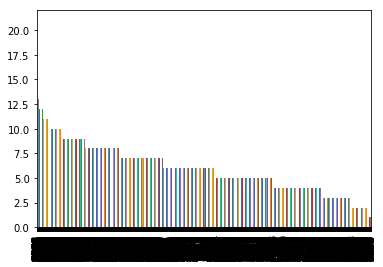

In [16]:
import time
N_classifiers = 10
for i in range(4,N_classifiers):
    print("waiting until garbage collector will free memory")
    time.sleep(20)
    print("Making the classifier {}".format(i))
    print("Preparing data...")
    X_generated, y_generated = construct_train_data_raif(X_train_data, X_train_data[target_column], ncats, 30000, target_column)
    #print("Data preparation done")
    #plt.figure(figsize=(16,9))
    X_generated[target_column].value_counts().plot.bar()
    X_generated['amount'] = X_generated['amount'].astype(dt['amount'])
    X_generated['currency'] = X_generated['currency'].astype(dt['currency'])
    X_generated['mcc'] = X_generated['mcc'].astype(dt['mcc'])
    X_generated['terminal_lat'] = X_generated['terminal_lat'].astype(dt['terminal_lat'])
    X_generated['terminal_lon'] = X_generated['terminal_lon'].astype(dt['terminal_lon'])
    X_generated['terminal_type'] = X_generated['terminal_type'].astype(dt['terminal_type'])
    X_generated['dayofweek'] = X_generated['dayofweek'].astype(dt['dayofweek'])
    X_generated['isweekend'] = X_generated['isweekend'].astype(dt['isweekend'])
    X_generated['amount_var'] = X_generated['amount_var'].astype(dt['amount_var'])
    X_generated['amount_mean'] = X_generated['amount_mean'].astype(dt['amount_mean'])
    X_generated['transaction_category'] = X_generated['transaction_category'].astype(dt['transaction_category'])
    X_generated['dist_after_last'] = X_generated['dist_after_last'].astype(dt['dist_after_last'])
    X_generated['mean_dist'] = X_generated['mean_dist'].astype(dt['mean_dist'])
    X_generated['place_visited'] = X_generated['place_visited'].astype(dt['place_visited'])
    X_generated['home_cat'] = X_generated['home_cat'].astype(dt['home_cat'])
    X_generated['work_cat'] = X_generated['work_cat'].astype(dt['work_cat'])
    X_generated.info(memory_usage='deep')
    X_generated = X_generated.drop(columns=['home_cat', 'work_cat'])

    X_train_current, X_test_current = X_generated, X_generated[25000:]
    y_train_current, y_test_current = y_generated, y_generated.iloc[25000:]
    # Convert input data from numpy to XGBoost format
    dtrain = xgb.DMatrix(X_train_current, label=y_train_current)
    dtest = xgb.DMatrix(X_test_current, label=y_test_current)

    gpu_res = {} # Store accuracy result

    # Train model
    model = xgb.train(param, dtrain, 50, evals=[(dtest, 'test')], evals_result=gpu_res, early_stopping_rounds=5)
    # save model
    model.save_model('xgboost_models/model_home_{}.model'.format(i))
    # dump model
    model.dump_model('xgboost_models/model_home_{}.txt'.format(i))
    model = None
    


In [ ]:
target_column = 'home_cat'

In [6]:
X_test_data = pd.read_csv('X_test_data_home_cat.csv')

In [7]:
X_test_data.head(5)

,Unnamed: 0,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,134907,2.204287,6430,5993,55.706480,37.624730,True,3,False,0.002545,2.172631,3,1,6.666666,4,2969,0
1,85966,2.364637,6430,5499,54.952858,20.467005,True,3,False,0.115562,2.235549,2,2,10.000000,21,1754,0
2,110393,3.940515,6430,6011,61.256000,73.446000,False,5,True,0.000000,3.940515,0,-1,-1.000000,1,5014,0
3,235148,2.207021,6430,5411,55.837456,49.158600,True,5,True,0.180943,2.077863,2,2,22.857143,8,2926,1421
4,109713,1.731061,6430,5411,54.196754,45.243168,True,3,False,0.188593,2.038138,1,-1,-1.000000,1,847,0


In [8]:
X_test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
X_test_data['amount'] = X_test_data['amount'].astype(dt['amount'])
X_test_data['currency'] = X_test_data['currency'].astype(dt['currency'])
X_test_data['mcc'] = X_test_data['mcc'].astype(dt['mcc'])
X_test_data['terminal_lat'] = X_test_data['terminal_lat'].astype(dt['terminal_lat'])
X_test_data['terminal_lon'] = X_test_data['terminal_lon'].astype(dt['terminal_lon'])
X_test_data['terminal_type'] = X_test_data['terminal_type'].astype(dt['terminal_type'])
X_test_data['dayofweek'] = X_test_data['dayofweek'].astype(dt['dayofweek'])
X_test_data['isweekend'] = X_test_data['isweekend'].astype(dt['isweekend'])
X_test_data['amount_var'] = X_test_data['amount_var'].astype(dt['amount_var'])
X_test_data['amount_mean'] = X_test_data['amount_mean'].astype(dt['amount_mean'])
X_test_data['transaction_category'] = X_test_data['transaction_category'].astype(dt['transaction_category'])
X_test_data['dist_after_last'] = X_test_data['dist_after_last'].astype(dt['dist_after_last'])
X_test_data['mean_dist'] = X_test_data['mean_dist'].astype(dt['mean_dist'])
X_test_data['place_visited'] = X_test_data['place_visited'].astype(dt['place_visited'])
X_test_data['home_cat'] = X_test_data['home_cat'].astype(dt['home_cat'])
X_test_data['work_cat'] = X_test_data['work_cat'].astype(dt['work_cat'])

In [10]:
X_test_data.head(5)

,amount,currency,mcc,terminal_lat,terminal_lon,terminal_type,dayofweek,isweekend,amount_var,amount_mean,transaction_category,dist_after_last,mean_dist,place_visited,home_cat,work_cat
0,2.204288,6430,5993,55.706478,37.624729,True,3,False,0.002545,2.172631,3,1,6.666667,4,2969,0
1,2.364637,6430,5499,54.952858,20.467005,True,3,False,0.115562,2.235549,2,2,10.000000,21,1754,0
2,3.940515,6430,6011,61.256001,73.445999,False,5,True,0.000000,3.940515,0,-1,-1.000000,1,5014,0
3,2.207021,6430,5411,55.837456,49.158600,True,5,True,0.180943,2.077863,2,2,22.857143,8,2926,1421
4,1.731061,6430,5411,54.196754,45.243168,True,3,False,0.188593,2.038138,1,-1,-1.000000,1,847,0


In [13]:
y_test_data = X_test_data[target_column][:72000]
X_test_data = X_test_data[:72000]
X_test_data.drop(columns=['home_cat','work_cat'], inplace=True)

In [25]:
def count_correct(a,b):
    assert a.shape == b.shape, "shapes must be equal"
    res = 0
    for idx in range(a.shape[0]):
        if a[idx] == b.iloc[idx]:
             res+=1
    return res

def count_correct_no_pandas(a,b):
    assert a.shape == b.shape, "shapes must be equal"
    res = 0
    for idx in range(a.shape[0]):
        if a[idx] == b[idx]:
             res+=1
    return res

In [20]:
for idx in range(10):
    summary = 0
    for j in range(X_test_data.shape[0] // 1000):
        X_test_data_current = X_test_data[j*1000:(j+1)*1000]
        y_test_data_current = y_test_data[j*1000:(j+1)*1000]
        model = xgb.Booster({'predictor': 'gpu_predictor'})
        model.load_model('xgboost_models/model_home_{}.model'.format(idx))
        dtest = xgb.DMatrix(X_test_data_current, label=y_test_data_current)
        y_pred_classes = model.predict(dtest)
        print('The accuracy of loaded model {} prediction on slice {} is:'.format(idx, j), accuracy_score(y_test_data_current, y_pred_classes))
        summary += count_correct(y_pred_classes,y_test_data_current)
        model =None
    print("Overall accuracy of model {} is {}".format(idx, summary/float(X_test_data.shape[0])))

The accuracy of loaded model 0 prediction on slice 0 is: 0.102
The accuracy of loaded model 0 prediction on slice 1 is: 0.107
The accuracy of loaded model 0 prediction on slice 2 is: 0.11
The accuracy of loaded model 0 prediction on slice 3 is: 0.11
The accuracy of loaded model 0 prediction on slice 4 is: 0.121
The accuracy of loaded model 0 prediction on slice 5 is: 0.104
The accuracy of loaded model 0 prediction on slice 6 is: 0.124
The accuracy of loaded model 0 prediction on slice 7 is: 0.105
The accuracy of loaded model 0 prediction on slice 8 is: 0.12
The accuracy of loaded model 0 prediction on slice 9 is: 0.113
The accuracy of loaded model 0 prediction on slice 10 is: 0.104
The accuracy of loaded model 0 prediction on slice 11 is: 0.117
The accuracy of loaded model 0 prediction on slice 12 is: 0.113
The accuracy of loaded model 0 prediction on slice 13 is: 0.124
The accuracy of loaded model 0 prediction on slice 14 is: 0.111
The accuracy of loaded model 0 prediction on slice 15

The accuracy of loaded model 1 prediction on slice 56 is: 0.106
The accuracy of loaded model 1 prediction on slice 57 is: 0.118
The accuracy of loaded model 1 prediction on slice 58 is: 0.114
The accuracy of loaded model 1 prediction on slice 59 is: 0.121
The accuracy of loaded model 1 prediction on slice 60 is: 0.114
The accuracy of loaded model 1 prediction on slice 61 is: 0.102
The accuracy of loaded model 1 prediction on slice 62 is: 0.101
The accuracy of loaded model 1 prediction on slice 63 is: 0.124
The accuracy of loaded model 1 prediction on slice 64 is: 0.118
The accuracy of loaded model 1 prediction on slice 65 is: 0.116
The accuracy of loaded model 1 prediction on slice 66 is: 0.133
The accuracy of loaded model 1 prediction on slice 67 is: 0.113
The accuracy of loaded model 1 prediction on slice 68 is: 0.119
The accuracy of loaded model 1 prediction on slice 69 is: 0.108
The accuracy of loaded model 1 prediction on slice 70 is: 0.11
The accuracy of loaded model 1 prediction

The accuracy of loaded model 3 prediction on slice 39 is: 0.12
The accuracy of loaded model 3 prediction on slice 40 is: 0.108
The accuracy of loaded model 3 prediction on slice 41 is: 0.105
The accuracy of loaded model 3 prediction on slice 42 is: 0.105
The accuracy of loaded model 3 prediction on slice 43 is: 0.117
The accuracy of loaded model 3 prediction on slice 44 is: 0.106
The accuracy of loaded model 3 prediction on slice 45 is: 0.108
The accuracy of loaded model 3 prediction on slice 46 is: 0.092
The accuracy of loaded model 3 prediction on slice 47 is: 0.128
The accuracy of loaded model 3 prediction on slice 48 is: 0.114
The accuracy of loaded model 3 prediction on slice 49 is: 0.121
The accuracy of loaded model 3 prediction on slice 50 is: 0.097
The accuracy of loaded model 3 prediction on slice 51 is: 0.119
The accuracy of loaded model 3 prediction on slice 52 is: 0.114
The accuracy of loaded model 3 prediction on slice 53 is: 0.109
The accuracy of loaded model 3 prediction

The accuracy of loaded model 5 prediction on slice 23 is: 0.113
The accuracy of loaded model 5 prediction on slice 24 is: 0.116
The accuracy of loaded model 5 prediction on slice 25 is: 0.109
The accuracy of loaded model 5 prediction on slice 26 is: 0.104
The accuracy of loaded model 5 prediction on slice 27 is: 0.123
The accuracy of loaded model 5 prediction on slice 28 is: 0.114
The accuracy of loaded model 5 prediction on slice 29 is: 0.099
The accuracy of loaded model 5 prediction on slice 30 is: 0.121
The accuracy of loaded model 5 prediction on slice 31 is: 0.108
The accuracy of loaded model 5 prediction on slice 32 is: 0.108
The accuracy of loaded model 5 prediction on slice 33 is: 0.11
The accuracy of loaded model 5 prediction on slice 34 is: 0.107
The accuracy of loaded model 5 prediction on slice 35 is: 0.114
The accuracy of loaded model 5 prediction on slice 36 is: 0.121
The accuracy of loaded model 5 prediction on slice 37 is: 0.106
The accuracy of loaded model 5 prediction

The accuracy of loaded model 7 prediction on slice 6 is: 0.111
The accuracy of loaded model 7 prediction on slice 7 is: 0.122
The accuracy of loaded model 7 prediction on slice 8 is: 0.116
The accuracy of loaded model 7 prediction on slice 9 is: 0.127
The accuracy of loaded model 7 prediction on slice 10 is: 0.113
The accuracy of loaded model 7 prediction on slice 11 is: 0.108
The accuracy of loaded model 7 prediction on slice 12 is: 0.106
The accuracy of loaded model 7 prediction on slice 13 is: 0.112
The accuracy of loaded model 7 prediction on slice 14 is: 0.118
The accuracy of loaded model 7 prediction on slice 15 is: 0.112
The accuracy of loaded model 7 prediction on slice 16 is: 0.106
The accuracy of loaded model 7 prediction on slice 17 is: 0.098
The accuracy of loaded model 7 prediction on slice 18 is: 0.114
The accuracy of loaded model 7 prediction on slice 19 is: 0.125
The accuracy of loaded model 7 prediction on slice 20 is: 0.112
The accuracy of loaded model 7 prediction on

The accuracy of loaded model 8 prediction on slice 62 is: 0.094
The accuracy of loaded model 8 prediction on slice 63 is: 0.127
The accuracy of loaded model 8 prediction on slice 64 is: 0.103
The accuracy of loaded model 8 prediction on slice 65 is: 0.109
The accuracy of loaded model 8 prediction on slice 66 is: 0.119
The accuracy of loaded model 8 prediction on slice 67 is: 0.098
The accuracy of loaded model 8 prediction on slice 68 is: 0.119
The accuracy of loaded model 8 prediction on slice 69 is: 0.111
The accuracy of loaded model 8 prediction on slice 70 is: 0.099
The accuracy of loaded model 8 prediction on slice 71 is: 0.123
Overall accuracy of model 8 is 0.11052777777777778
The accuracy of loaded model 9 prediction on slice 0 is: 0.101
The accuracy of loaded model 9 prediction on slice 1 is: 0.106
The accuracy of loaded model 9 prediction on slice 2 is: 0.109
The accuracy of loaded model 9 prediction on slice 3 is: 0.11
The accuracy of loaded model 9 prediction on slice 4 is: 0

In [26]:
summary = 0
for j in range(X_test_data.shape[0] // 1000):
    X_test_data_current = X_test_data[j*1000:(j+1)*1000]
    y_test_data_current = y_test_data[j*1000:(j+1)*1000]
    models_answers = []
    for idx in range(10):
        model = xgb.Booster({'predictor': 'gpu_predictor'})
        model.load_model('xgboost_models/model_home_{}.model'.format(idx))
        dtest = xgb.DMatrix(X_test_data_current, label=y_test_data_current)
        y_pred_classes = model.predict(dtest)
        models_answers.append(y_pred_classes)
        model = None
    final_answers = []
    for k in range(1000):
        answers = []
        for idx in range(10):
            answers.append(models_answers[idx][k])
        uq = np.unique(answers, return_counts=True)
        final_answers.append(uq[0][np.argmax(uq[1])])
    print('The accuracy of voting prediction on slice {} is:'.format(j), accuracy_score(y_test_data_current, final_answers))
    summary += count_correct(np.array(final_answers),y_test_data_current)  
print("Overall accuracy of model {} is {}".format(idx, summary/float(X_test_data.shape[0])))

The accuracy of voting prediction on slice 0 is: 0.192
The accuracy of voting prediction on slice 1 is: 0.168
The accuracy of voting prediction on slice 2 is: 0.179
The accuracy of voting prediction on slice 3 is: 0.188
The accuracy of voting prediction on slice 4 is: 0.19
The accuracy of voting prediction on slice 5 is: 0.174
The accuracy of voting prediction on slice 6 is: 0.196
The accuracy of voting prediction on slice 7 is: 0.208
The accuracy of voting prediction on slice 8 is: 0.208
The accuracy of voting prediction on slice 9 is: 0.2
The accuracy of voting prediction on slice 10 is: 0.163
The accuracy of voting prediction on slice 11 is: 0.204
The accuracy of voting prediction on slice 12 is: 0.179
The accuracy of voting prediction on slice 13 is: 0.197
The accuracy of voting prediction on slice 14 is: 0.2
The accuracy of voting prediction on slice 15 is: 0.2
The accuracy of voting prediction on slice 16 is: 0.169
The accuracy of voting prediction on slice 17 is: 0.186
The accur

# Finally
Хотя результаты далеки от тех (~0.13 для работы и ~0.19 для дома), что лидировали в турнирной таблице, прослеживается польза применения нескольких моделей на рандомизированных подвыборках. Кроме того в сорвеновании необходимо было определить координаты дома и работы для customer_id, поэтому в данной работе не хватает ещё голосования по каждому из customer_id, поэтому и значения accuracy могут быть меньше (хотя, могут быть, конечно, и больше).

Что ещё здесь можно сделать:
1. Докупить себе оперативной памяти, и попробовать обучаться на бОльших объёмах 
2. Попробовать обучение на более сырых данных, сделать не такой строгий отсев, тем самым больше довериться бустингу
3. Посмотреть влияние полученных мной признаков на результат
4. Посчитать precision, recall для полученных моделей
5. Обучить больше голосующих моделей
6. Попробовать более разумный метод выбора корректного ответа, среди ответов голосующих моделей (например, надросить ещё один классификатор, как упоминалось выше)
7. Узнать что предпринимали другие люди, поскольку многие добивались существенно более хороших результатов ГОРАЗДО меньшими усилиями